In [1]:
import pandas as pd

In [2]:
trips = pd.read_csv('yellow_tripdata_2016-01.csv')

In [3]:
trips.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2016-01-01 00:00:00,2016-01-01 00:00:00,2,1.10,-73.990372,40.734695,1,N,-73.981842,40.732407,2,7.5,0.5,0.5,0.0,0.0,0.3,8.8
1,2,2016-01-01 00:00:00,2016-01-01 00:00:00,5,4.90,-73.980782,40.729912,1,N,-73.944473,40.716679,1,18.0,0.5,0.5,0.0,0.0,0.3,19.3
2,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,10.54,-73.984550,40.679565,1,N,-73.950272,40.788925,1,33.0,0.5,0.5,0.0,0.0,0.3,34.3
3,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,4.75,-73.993469,40.718990,1,N,-73.962242,40.657333,2,16.5,0.0,0.5,0.0,0.0,0.3,17.3
4,2,2016-01-01 00:00:00,2016-01-01 00:00:00,3,1.76,-73.960625,40.781330,1,N,-73.977264,40.758514,2,8.0,0.0,0.5,0.0,0.0,0.3,8.8


In [4]:
trips = trips[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_distance', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']]

In [5]:
trips.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,2016-01-01 00:00:00,2016-01-01 00:00:00,1.10,-73.990372,40.734695,-73.981842,40.732407
1,2016-01-01 00:00:00,2016-01-01 00:00:00,4.90,-73.980782,40.729912,-73.944473,40.716679
2,2016-01-01 00:00:00,2016-01-01 00:00:00,10.54,-73.984550,40.679565,-73.950272,40.788925
3,2016-01-01 00:00:00,2016-01-01 00:00:00,4.75,-73.993469,40.718990,-73.962242,40.657333
4,2016-01-01 00:00:00,2016-01-01 00:00:00,1.76,-73.960625,40.781330,-73.977264,40.758514


In [7]:
import numpy as np

In [8]:
lga_long = -73.8702298524
lga_lat = 40.7730135746
#csv data source: https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

In [9]:
lga_long_rad = lga_long*np.pi/180
lga_lat_rad = lga_lat*np.pi/180

In [10]:
def distanceToLGA(df):
    long_rad = df['pickup_longitude']*np.pi/180
    lat_rad = df['pickup_latitude']*np.pi/180
    drad = 2*np.arcsin(np.sqrt(np.sin((lat_rad-lga_lat_rad)/2)*np.sin((lat_rad-lga_lat_rad)/2)+np.cos(lat_rad)*np.cos(lga_lat_rad)*np.sin((long_rad-lga_long_rad)/2)*np.sin((long_rad-lga_long_rad)/2)))
    dmile = drad*180*60*1.15/np.pi
    return df.assign(pku_LGA=dmile)

In [11]:
trips.pipe(distanceToLGA).head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pku_LGA
0,2016-01-01 00:00:00,2016-01-01 00:00:00,1.10,-73.990372,40.734695,-73.981842,40.732407,6.813587
1,2016-01-01 00:00:00,2016-01-01 00:00:00,4.90,-73.980782,40.729912,-73.944473,40.716679,6.499028
2,2016-01-01 00:00:00,2016-01-01 00:00:00,10.54,-73.984550,40.679565,-73.950272,40.788925,8.792662
3,2016-01-01 00:00:00,2016-01-01 00:00:00,4.75,-73.993469,40.718990,-73.962242,40.657333,7.443047
4,2016-01-01 00:00:00,2016-01-01 00:00:00,1.76,-73.960625,40.781330,-73.977264,40.758514,4.757918


In [12]:
trips = trips.pipe(distanceToLGA)

In [13]:
trips.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pku_LGA
0,2016-01-01 00:00:00,2016-01-01 00:00:00,1.10,-73.990372,40.734695,-73.981842,40.732407,6.813587
1,2016-01-01 00:00:00,2016-01-01 00:00:00,4.90,-73.980782,40.729912,-73.944473,40.716679,6.499028
2,2016-01-01 00:00:00,2016-01-01 00:00:00,10.54,-73.984550,40.679565,-73.950272,40.788925,8.792662
3,2016-01-01 00:00:00,2016-01-01 00:00:00,4.75,-73.993469,40.718990,-73.962242,40.657333,7.443047
4,2016-01-01 00:00:00,2016-01-01 00:00:00,1.76,-73.960625,40.781330,-73.977264,40.758514,4.757918


In [14]:
def distanceToLGA_dropoff(df):
    long_rad = df['dropoff_longitude']*np.pi/180
    lat_rad = df['dropoff_latitude']*np.pi/180
    drad = 2*np.arcsin(np.sqrt(np.sin((lat_rad-lga_lat_rad)/2)*np.sin((lat_rad-lga_lat_rad)/2)+np.cos(lat_rad)*np.cos(lga_lat_rad)*np.sin((long_rad-lga_long_rad)/2)*np.sin((long_rad-lga_long_rad)/2)))
    dmile = drad*180*60*1.15/np.pi
    return df.assign(dpo_LGA=dmile)

In [15]:
trips = trips.pipe(distanceToLGA_dropoff)

In [16]:
trips.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pku_LGA,dpo_LGA
0,2016-01-01 00:00:00,2016-01-01 00:00:00,1.10,-73.990372,40.734695,-73.981842,40.732407,6.813587,6.471903
1,2016-01-01 00:00:00,2016-01-01 00:00:00,4.90,-73.980782,40.729912,-73.944473,40.716679,6.499028,5.492993
2,2016-01-01 00:00:00,2016-01-01 00:00:00,10.54,-73.984550,40.679565,-73.950272,40.788925,8.792662,4.323707
3,2016-01-01 00:00:00,2016-01-01 00:00:00,4.75,-73.993469,40.718990,-73.962242,40.657333,7.443047,9.320319
4,2016-01-01 00:00:00,2016-01-01 00:00:00,1.76,-73.960625,40.781330,-73.977264,40.758514,4.757918,5.682344


In [17]:
trips_fromLGA = trips.loc[(trips['pku_LGA'] <= 1.0) & (trips['dpo_LGA'] >= 2.0), :]
trips_fromLGA

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pku_LGA,dpo_LGA
289,2016-01-29 09:18:37,2016-01-29 09:56:54,10.20,-73.872765,40.773754,-73.973061,40.761772,0.141964,5.429452
422,2016-01-29 09:19:02,2016-01-29 09:50:34,8.60,-73.870934,40.773758,-73.982758,40.742805,0.063166,6.239775
569,2016-01-29 09:19:26,2016-01-29 10:06:03,13.00,-73.862831,40.768871,-73.976311,40.760128,0.480801,5.614521
687,2016-01-29 09:19:47,2016-01-29 09:59:49,8.28,-73.885704,40.773121,-73.971619,40.757339,0.808620,5.407833
779,2016-01-29 09:20:02,2016-01-29 09:55:13,12.16,-73.872849,40.774071,-73.988960,40.734882,0.155063,6.740601
807,2016-01-29 09:20:09,2016-01-29 09:55:37,10.03,-73.872910,40.774151,-73.970413,40.761841,0.160513,5.291865
841,2016-01-29 09:20:14,2016-01-29 09:43:51,9.46,-73.862823,40.768822,-73.954689,40.765785,0.483163,4.441652
875,2016-01-29 09:20:21,2016-01-29 10:10:36,12.80,-73.863068,40.769451,-73.987350,40.755669,0.447767,6.236713
881,2016-01-29 09:20:23,2016-01-29 09:44:32,10.80,-73.873146,40.774136,-73.905655,40.678722,0.170921,6.764662
887,2016-01-29 09:20:24,2016-01-29 09:47:55,8.70,-73.870964,40.773941,-73.981499,40.739906,0.074614,6.248248


In [18]:
trips_toLGA = trips.loc[(trips['dpo_LGA'] <= 1.0) & (trips['pku_LGA'] >= 2.0), :]
trips_toLGA
#pku_LGA: distance from pickup location to LGA coordinates
#dpo_LGA: distance from dropoff location to LGA coordinates

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pku_LGA,dpo_LGA
268,2016-01-29 09:18:33,2016-01-29 09:40:10,10.76,-73.977135,40.751945,-73.870529,40.773758,5.773101,0.053690
307,2016-01-29 09:18:39,2016-01-29 09:45:00,8.82,-73.975693,40.765018,-73.870613,40.773979,5.538719,0.069572
388,2016-01-29 09:18:54,2016-01-29 10:08:47,12.93,-74.000771,40.762310,-73.865028,40.770580,6.861671,0.319477
547,2016-01-29 09:19:22,2016-01-29 09:44:07,13.30,-74.015770,40.711155,-73.872437,40.774536,8.724008,0.155988
549,2016-01-29 09:19:22,2016-01-29 10:01:30,8.76,-73.977409,40.753002,-73.861877,40.768440,5.769067,0.538587
551,2016-01-29 09:19:23,2016-01-29 09:51:46,10.30,-73.985771,40.760078,-73.861649,40.768291,6.103679,0.554296
600,2016-01-29 09:19:32,2016-01-29 09:47:54,9.30,-73.984108,40.755341,-73.871193,40.774200,6.075012,0.096120
691,2016-01-29 09:19:48,2016-01-29 09:49:40,10.00,-73.975052,40.787968,-73.865036,40.770565,5.573094,0.319693
736,2016-01-29 09:19:56,2016-01-29 09:46:04,8.54,-73.960808,40.780991,-73.873009,40.774441,4.764664,0.175449
767,2016-01-29 09:20:02,2016-01-29 09:40:16,10.60,-73.973946,40.756927,-73.872459,40.774529,5.532686,0.156522


In [25]:
# trips_fromLGA.to_csv('tripsFromLGA_012016.csv', index=False)
# trips_toLGA.to_csv('tripsToLGA_012016.csv', index=False)

In [19]:
import matplotlib
import matplotlib.pyplot as plt

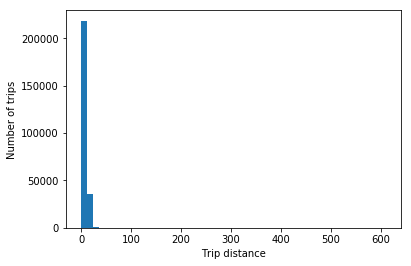

In [20]:
fig, ax = plt.subplots()
ax.hist(trips_fromLGA['trip_distance'], 50)
ax.set_xlabel('Trip distance')
ax.set_ylabel('Number of trips')
plt.show()

In [21]:
trips_fromLGA = trips_fromLGA.loc[trips_fromLGA['trip_distance'] < 20, :]

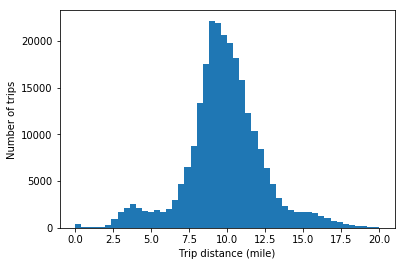

In [22]:
fig, ax = plt.subplots()
ax.hist(trips_fromLGA['trip_distance'], 50)
ax.set_xlabel('Trip distance (mile)')
ax.set_ylabel('Number of trips')
plt.show()

In [23]:
trips_fromLGA['pku_date'] = pd.to_datetime(trips_fromLGA['tpep_pickup_datetime'].str[:10], infer_datetime_format=True)
trips_fromLGA

/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pku_LGA,dpo_LGA,pku_date
289,2016-01-29 09:18:37,2016-01-29 09:56:54,10.20,-73.872765,40.773754,-73.973061,40.761772,0.141964,5.429452,2016-01-29
422,2016-01-29 09:19:02,2016-01-29 09:50:34,8.60,-73.870934,40.773758,-73.982758,40.742805,0.063166,6.239775,2016-01-29
569,2016-01-29 09:19:26,2016-01-29 10:06:03,13.00,-73.862831,40.768871,-73.976311,40.760128,0.480801,5.614521,2016-01-29
687,2016-01-29 09:19:47,2016-01-29 09:59:49,8.28,-73.885704,40.773121,-73.971619,40.757339,0.808620,5.407833,2016-01-29
779,2016-01-29 09:20:02,2016-01-29 09:55:13,12.16,-73.872849,40.774071,-73.988960,40.734882,0.155063,6.740601,2016-01-29
807,2016-01-29 09:20:09,2016-01-29 09:55:37,10.03,-73.872910,40.774151,-73.970413,40.761841,0.160513,5.291865,2016-01-29
841,2016-01-29 09:20:14,2016-01-29 09:43:51,9.46,-73.862823,40.768822,-73.954689,40.765785,0.483163,4.441652,2016-01-29
875,2016-01-29 09:20:21,2016-01-29 10:10:36,12.80,-73.863068,40.769451,-73.987350,40.755669,0.447767,6.236713,2016-01-29
881,2016-01-29 09:20:23,2016-01-29 09:44:32,10.80,-73.873146,40.774136,-73.905655,40.678722,0.170921,6.764662,2016-01-29
887,2016-01-29 09:20:24,2016-01-29 09:47:55,8.70,-73.870964,40.773941,-73.981499,40.739906,0.074614,6.248248,2016-01-29


In [24]:
def distance(df):
    pku_long_rad = df['pickup_longitude']*np.pi/180
    pku_lat_rad = df['pickup_latitude']*np.pi/180
    dpo_long_rad = df['dropoff_longitude']*np.pi/180
    dpo_lat_rad = df['dropoff_latitude']*np.pi/180
    drad = 2*np.arcsin(np.sqrt(np.sin((pku_lat_rad-dpo_lat_rad)/2)*np.sin((pku_lat_rad-dpo_lat_rad)/2)+np.cos(pku_lat_rad)*np.cos(dpo_lat_rad)*np.sin((pku_long_rad-dpo_long_rad)/2)*np.sin((pku_long_rad-dpo_long_rad)/2)))
    dmile = drad*180*60*1.15/np.pi
    return df.assign(distance=dmile)

In [26]:
trips_fromLGA = trips_fromLGA.pipe(distance)
trips_fromLGA

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pku_LGA,dpo_LGA,pku_date,distance
289,2016-01-29 09:18:37,2016-01-29 09:56:54,10.20,-73.872765,40.773754,-73.973061,40.761772,0.141964,5.429452,2016-01-29,5.306076
422,2016-01-29 09:19:02,2016-01-29 09:50:34,8.60,-73.870934,40.773758,-73.982758,40.742805,0.063166,6.239775,2016-01-29,6.222531
569,2016-01-29 09:19:26,2016-01-29 10:06:03,13.00,-73.862831,40.768871,-73.976311,40.760128,0.480801,5.614521,2016-01-29,5.961116
687,2016-01-29 09:19:47,2016-01-29 09:59:49,8.28,-73.885704,40.773121,-73.971619,40.757339,0.808620,5.407833,2016-01-29,4.620057
779,2016-01-29 09:20:02,2016-01-29 09:55:13,12.16,-73.872849,40.774071,-73.988960,40.734882,0.155063,6.740601,2016-01-29,6.644107
807,2016-01-29 09:20:09,2016-01-29 09:55:37,10.03,-73.872910,40.774151,-73.970413,40.761841,0.160513,5.291865,2016-01-29,5.165642
841,2016-01-29 09:20:14,2016-01-29 09:43:51,9.46,-73.862823,40.768822,-73.954689,40.765785,0.483163,4.441652,2016-01-29,4.805314
875,2016-01-29 09:20:21,2016-01-29 10:10:36,12.80,-73.863068,40.769451,-73.987350,40.755669,0.447767,6.236713,2016-01-29,6.564532
881,2016-01-29 09:20:23,2016-01-29 09:44:32,10.80,-73.873146,40.774136,-73.905655,40.678722,0.170921,6.764662,2016-01-29,6.799433
887,2016-01-29 09:20:24,2016-01-29 09:47:55,8.70,-73.870964,40.773941,-73.981499,40.739906,0.074614,6.248248,2016-01-29,6.236325


In [27]:
trips_fromLGA['distance_ratio'] = trips_fromLGA['trip_distance']/trips_fromLGA['distance']
trips_fromLGA

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pku_LGA,dpo_LGA,pku_date,distance,distance_ratio
289,2016-01-29 09:18:37,2016-01-29 09:56:54,10.20,-73.872765,40.773754,-73.973061,40.761772,0.141964,5.429452,2016-01-29,5.306076,1.922324
422,2016-01-29 09:19:02,2016-01-29 09:50:34,8.60,-73.870934,40.773758,-73.982758,40.742805,0.063166,6.239775,2016-01-29,6.222531,1.382074
569,2016-01-29 09:19:26,2016-01-29 10:06:03,13.00,-73.862831,40.768871,-73.976311,40.760128,0.480801,5.614521,2016-01-29,5.961116,2.180800
687,2016-01-29 09:19:47,2016-01-29 09:59:49,8.28,-73.885704,40.773121,-73.971619,40.757339,0.808620,5.407833,2016-01-29,4.620057,1.792186
779,2016-01-29 09:20:02,2016-01-29 09:55:13,12.16,-73.872849,40.774071,-73.988960,40.734882,0.155063,6.740601,2016-01-29,6.644107,1.830193
807,2016-01-29 09:20:09,2016-01-29 09:55:37,10.03,-73.872910,40.774151,-73.970413,40.761841,0.160513,5.291865,2016-01-29,5.165642,1.941676
841,2016-01-29 09:20:14,2016-01-29 09:43:51,9.46,-73.862823,40.768822,-73.954689,40.765785,0.483163,4.441652,2016-01-29,4.805314,1.968654
875,2016-01-29 09:20:21,2016-01-29 10:10:36,12.80,-73.863068,40.769451,-73.987350,40.755669,0.447767,6.236713,2016-01-29,6.564532,1.949872
881,2016-01-29 09:20:23,2016-01-29 09:44:32,10.80,-73.873146,40.774136,-73.905655,40.678722,0.170921,6.764662,2016-01-29,6.799433,1.588368
887,2016-01-29 09:20:24,2016-01-29 09:47:55,8.70,-73.870964,40.773941,-73.981499,40.739906,0.074614,6.248248,2016-01-29,6.236325,1.395052


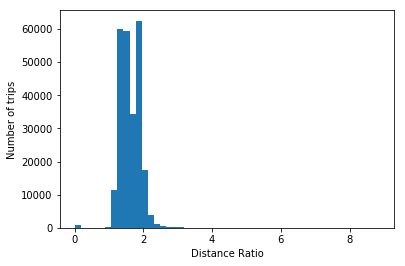

In [28]:
fig, ax = plt.subplots()
ax.hist(trips_fromLGA['distance_ratio'], 50)
ax.set_xlabel('Distance Ratio')
ax.set_ylabel('Number of trips')
plt.show()

In [29]:
trips_fromLGA['distance_ratio'].max()

8.863111838479375

In [30]:
trips_fromLGA['distance_ratio'].mean()

1.6168148829405047

In [31]:
trips_fromLGA['distance_ratio'].median()

1.5713985001171744

In [32]:
trips_fromLGA['distance_ratio'].mode()

0    0.0
dtype: float64

In [33]:
trips_fromLGA['pku_time'] = pd.to_datetime(trips_fromLGA['tpep_pickup_datetime'], infer_datetime_format=True)
trips_fromLGA['dpo_time'] = pd.to_datetime(trips_fromLGA['tpep_dropoff_datetime'], infer_datetime_format=True)

In [34]:
trips_fromLGA

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pku_LGA,dpo_LGA,pku_date,distance,distance_ratio,pku_time,dpo_time
289,2016-01-29 09:18:37,2016-01-29 09:56:54,10.20,-73.872765,40.773754,-73.973061,40.761772,0.141964,5.429452,2016-01-29,5.306076,1.922324,2016-01-29 09:18:37,2016-01-29 09:56:54
422,2016-01-29 09:19:02,2016-01-29 09:50:34,8.60,-73.870934,40.773758,-73.982758,40.742805,0.063166,6.239775,2016-01-29,6.222531,1.382074,2016-01-29 09:19:02,2016-01-29 09:50:34
569,2016-01-29 09:19:26,2016-01-29 10:06:03,13.00,-73.862831,40.768871,-73.976311,40.760128,0.480801,5.614521,2016-01-29,5.961116,2.180800,2016-01-29 09:19:26,2016-01-29 10:06:03
687,2016-01-29 09:19:47,2016-01-29 09:59:49,8.28,-73.885704,40.773121,-73.971619,40.757339,0.808620,5.407833,2016-01-29,4.620057,1.792186,2016-01-29 09:19:47,2016-01-29 09:59:49
779,2016-01-29 09:20:02,2016-01-29 09:55:13,12.16,-73.872849,40.774071,-73.988960,40.734882,0.155063,6.740601,2016-01-29,6.644107,1.830193,2016-01-29 09:20:02,2016-01-29 09:55:13
807,2016-01-29 09:20:09,2016-01-29 09:55:37,10.03,-73.872910,40.774151,-73.970413,40.761841,0.160513,5.291865,2016-01-29,5.165642,1.941676,2016-01-29 09:20:09,2016-01-29 09:55:37
841,2016-01-29 09:20:14,2016-01-29 09:43:51,9.46,-73.862823,40.768822,-73.954689,40.765785,0.483163,4.441652,2016-01-29,4.805314,1.968654,2016-01-29 09:20:14,2016-01-29 09:43:51
875,2016-01-29 09:20:21,2016-01-29 10:10:36,12.80,-73.863068,40.769451,-73.987350,40.755669,0.447767,6.236713,2016-01-29,6.564532,1.949872,2016-01-29 09:20:21,2016-01-29 10:10:36
881,2016-01-29 09:20:23,2016-01-29 09:44:32,10.80,-73.873146,40.774136,-73.905655,40.678722,0.170921,6.764662,2016-01-29,6.799433,1.588368,2016-01-29 09:20:23,2016-01-29 09:44:32
887,2016-01-29 09:20:24,2016-01-29 09:47:55,8.70,-73.870964,40.773941,-73.981499,40.739906,0.074614,6.248248,2016-01-29,6.236325,1.395052,2016-01-29 09:20:24,2016-01-29 09:47:55


In [35]:
from datetime import timedelta

In [36]:
trips_fromLGA['avg_speed'] = trips_fromLGA['trip_distance']/((trips_fromLGA['dpo_time']-trips_fromLGA['pku_time'])/timedelta(seconds=1)/3600)
trips_fromLGA

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pku_LGA,dpo_LGA,pku_date,distance,distance_ratio,pku_time,dpo_time,avg_speed
289,2016-01-29 09:18:37,2016-01-29 09:56:54,10.20,-73.872765,40.773754,-73.973061,40.761772,0.141964,5.429452,2016-01-29,5.306076,1.922324,2016-01-29 09:18:37,2016-01-29 09:56:54,15.986069
422,2016-01-29 09:19:02,2016-01-29 09:50:34,8.60,-73.870934,40.773758,-73.982758,40.742805,0.063166,6.239775,2016-01-29,6.222531,1.382074,2016-01-29 09:19:02,2016-01-29 09:50:34,16.363636
569,2016-01-29 09:19:26,2016-01-29 10:06:03,13.00,-73.862831,40.768871,-73.976311,40.760128,0.480801,5.614521,2016-01-29,5.961116,2.180800,2016-01-29 09:19:26,2016-01-29 10:06:03,16.732213
687,2016-01-29 09:19:47,2016-01-29 09:59:49,8.28,-73.885704,40.773121,-73.971619,40.757339,0.808620,5.407833,2016-01-29,4.620057,1.792186,2016-01-29 09:19:47,2016-01-29 09:59:49,12.409659
779,2016-01-29 09:20:02,2016-01-29 09:55:13,12.16,-73.872849,40.774071,-73.988960,40.734882,0.155063,6.740601,2016-01-29,6.644107,1.830193,2016-01-29 09:20:02,2016-01-29 09:55:13,20.737091
807,2016-01-29 09:20:09,2016-01-29 09:55:37,10.03,-73.872910,40.774151,-73.970413,40.761841,0.160513,5.291865,2016-01-29,5.165642,1.941676,2016-01-29 09:20:09,2016-01-29 09:55:37,16.968045
841,2016-01-29 09:20:14,2016-01-29 09:43:51,9.46,-73.862823,40.768822,-73.954689,40.765785,0.483163,4.441652,2016-01-29,4.805314,1.968654,2016-01-29 09:20:14,2016-01-29 09:43:51,24.033874
875,2016-01-29 09:20:21,2016-01-29 10:10:36,12.80,-73.863068,40.769451,-73.987350,40.755669,0.447767,6.236713,2016-01-29,6.564532,1.949872,2016-01-29 09:20:21,2016-01-29 10:10:36,15.283582
881,2016-01-29 09:20:23,2016-01-29 09:44:32,10.80,-73.873146,40.774136,-73.905655,40.678722,0.170921,6.764662,2016-01-29,6.799433,1.588368,2016-01-29 09:20:23,2016-01-29 09:44:32,26.832298
887,2016-01-29 09:20:24,2016-01-29 09:47:55,8.70,-73.870964,40.773941,-73.981499,40.739906,0.074614,6.248248,2016-01-29,6.236325,1.395052,2016-01-29 09:20:24,2016-01-29 09:47:55,18.970321


In [37]:
trips_fromLGA = trips_fromLGA.loc[trips_fromLGA['trip_distance'] > 0.0, :]

In [38]:
trips_fromLGA = trips_fromLGA.loc[(trips_fromLGA['dpo_time']-trips_fromLGA['pku_time'])/timedelta(seconds=1) != 0.0, :]

In [39]:
trips_fromLGA = trips_fromLGA.loc[trips_fromLGA['avg_speed'] < 50.0, :]

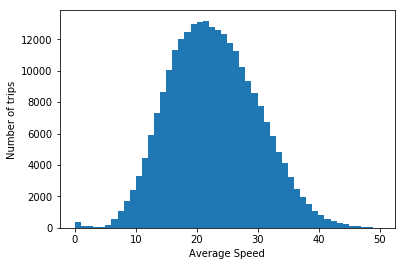

In [40]:
fig, ax = plt.subplots()
ax.hist(trips_fromLGA['avg_speed'], 50)
ax.set_xlabel('Average Speed')
ax.set_ylabel('Number of trips')
plt.show()

In [41]:
trips_fromLGA['avg_speed'].mean()

22.729490582447642

In [42]:
from datetime import datetime
trips_Jan15 = trips_fromLGA.loc[trips_fromLGA['pku_date'] == datetime(2016,1,15), :]
trips_Jan15

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pku_LGA,dpo_LGA,pku_date,distance,distance_ratio,pku_time,dpo_time,avg_speed
2196208,2016-01-15 20:05:23,2016-01-15 20:51:51,11.38,-73.863838,40.769764,-73.952538,40.823307,0.402282,5.525064,2016-01-15,5.925882,1.920389,2016-01-15 20:05:23,2016-01-15 20:51:51,14.694405
2196219,2016-01-15 20:05:24,2016-01-15 20:29:57,8.08,-73.874527,40.774151,-73.965019,40.801037,0.237857,5.316184,2016-01-15,5.078493,1.591023,2016-01-15 20:05:24,2016-01-15 20:29:57,19.747454
2196268,2016-01-15 20:05:34,2016-01-15 20:32:49,10.70,-73.874504,40.774029,-73.980560,40.764648,0.234071,5.794377,2016-01-15,5.579822,1.917624,2016-01-15 20:05:34,2016-01-15 20:32:49,23.559633
2196313,2016-01-15 20:05:42,2016-01-15 20:31:21,10.10,-73.873199,40.774055,-73.974686,40.687443,0.171017,8.043152,2016-01-15,7.992119,1.263745,2016-01-15 20:05:42,2016-01-15 20:31:21,23.625731
2196337,2016-01-15 20:05:45,2016-01-15 20:30:31,10.40,-73.874489,40.774097,-73.978836,40.761948,0.234776,5.726700,2016-01-15,5.517024,1.885074,2016-01-15 20:05:45,2016-01-15 20:30:31,25.195155
2196400,2016-01-15 20:05:54,2016-01-15 20:23:54,8.10,-73.870987,40.773819,-73.956795,40.780727,0.068215,4.554298,2016-01-15,4.508772,1.796498,2016-01-15 20:05:54,2016-01-15 20:23:54,27.000000
2196411,2016-01-15 20:05:55,2016-01-15 20:30:10,11.55,-73.862862,40.768829,-73.833504,40.664589,0.481251,7.723907,2016-01-15,7.354636,1.570438,2016-01-15 20:05:55,2016-01-15 20:30:10,28.577320
2196415,2016-01-15 20:05:56,2016-01-15 20:26:13,8.70,-73.873772,40.775127,-73.982552,40.755531,0.235637,5.992680,2016-01-15,5.843419,1.488854,2016-01-15 20:05:56,2016-01-15 20:26:13,25.735415
2196420,2016-01-15 20:05:56,2016-01-15 20:21:22,4.94,-73.870819,40.773689,-73.922241,40.744400,0.055872,3.359701,2016-01-15,3.362634,1.469087,2016-01-15 20:05:56,2016-01-15 20:21:22,19.205184
2196455,2016-01-15 20:06:01,2016-01-15 20:25:33,9.47,-73.872948,40.774120,-73.966164,40.764820,0.161247,5.044999,2016-01-15,4.913242,1.927444,2016-01-15 20:06:01,2016-01-15 20:25:33,29.088737


In [43]:
trips_Jan15.iloc[0]

tpep_pickup_datetime     2016-01-15 20:05:23
tpep_dropoff_datetime    2016-01-15 20:51:51
trip_distance                          11.38
pickup_longitude                    -73.8638
pickup_latitude                      40.7698
dropoff_longitude                   -73.9525
dropoff_latitude                     40.8233
pku_LGA                             0.402282
dpo_LGA                              5.52506
pku_date                 2016-01-15 00:00:00
distance                             5.92588
distance_ratio                       1.92039
pku_time                 2016-01-15 20:05:23
dpo_time                 2016-01-15 20:51:51
avg_speed                            14.6944
Name: 2196208, dtype: object

In [44]:
import networkx as nx

In [45]:
trips_pool = trips_Jan15.loc[(trips_Jan15['pku_time'] >= datetime(2016,1,15,0,0,0)) & (trips_Jan15['pku_time'] < datetime(2016,1,15,0,5,0)),:]
trips_pool

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pku_LGA,dpo_LGA,pku_date,distance,distance_ratio,pku_time,dpo_time,avg_speed
4850318,2016-01-15 00:00:03,2016-01-15 00:18:32,10.20,-73.862518,40.769878,-73.946404,40.838249,0.457363,6.007421,2016-01-15,6.438262,1.584279,2016-01-15 00:00:03,2016-01-15 00:18:32,33.110911
4850375,2016-01-15 00:00:18,2016-01-15 00:26:03,11.20,-73.870987,40.773781,-73.981850,40.755772,0.066088,5.953408,2016-01-15,5.925488,1.890140,2016-01-15 00:00:18,2016-01-15 00:26:03,26.097087
4850380,2016-01-15 00:00:19,2016-01-15 00:21:44,11.09,-73.873184,40.774094,-73.986595,40.763733,0.171422,6.114588,2016-01-15,5.969490,1.857780,2016-01-15 00:00:19,2016-01-15 00:21:44,31.069261
4850421,2016-01-15 00:00:28,2016-01-15 00:21:59,10.90,-73.870819,40.773724,-73.979111,40.746323,0.057864,5.981186,2016-01-15,5.967206,1.826650,2016-01-15 00:00:28,2016-01-15 00:21:59,30.395043
4850425,2016-01-15 00:00:28,2016-01-15 00:28:32,9.93,-73.870964,40.773804,-73.986076,40.758904,0.066665,6.131858,2016-01-15,6.102891,1.627098,2016-01-15 00:00:28,2016-01-15 00:28:32,21.228029
4850445,2016-01-15 00:00:32,2016-01-15 00:08:25,3.20,-73.874512,40.774109,-73.917419,40.766357,0.236162,2.508367,2016-01-15,2.305098,1.388227,2016-01-15 00:00:32,2016-01-15 00:08:25,24.355180
4850446,2016-01-15 00:00:32,2016-01-15 00:23:21,10.00,-73.874573,40.774117,-73.976425,40.792427,0.239352,5.707719,2016-01-15,5.469292,1.828390,2016-01-15 00:00:32,2016-01-15 00:23:21,26.296567
4850450,2016-01-15 00:00:32,2016-01-15 00:23:15,9.78,-73.874504,40.774082,-73.980125,40.788113,0.235200,5.835572,2016-01-15,5.602727,1.745578,2016-01-15 00:00:32,2016-01-15 00:23:15,25.831255
4850452,2016-01-15 00:00:32,2016-01-15 00:20:45,9.41,-73.863899,40.769726,-73.962288,40.799980,0.401120,5.156806,2016-01-15,5.547998,1.696107,2016-01-15 00:00:32,2016-01-15 00:20:45,27.927453
4850468,2016-01-15 00:00:35,2016-01-15 00:16:26,8.93,-73.870697,40.773788,-73.951569,40.766361,0.058776,4.275191,2016-01-15,4.257001,2.097721,2016-01-15 00:00:35,2016-01-15 00:16:26,33.804416


In [46]:
G = nx.Graph()
for i in range(len(trips_pool)):
    G.add_node(i)
G

In [47]:
def distanceTwoTrips(trip1, trip2):
    pku_long_rad = trip1.dropoff_longitude*np.pi/180
    pku_lat_rad = trip1.dropoff_latitude*np.pi/180
    dpo_long_rad = trip2.dropoff_longitude*np.pi/180
    dpo_lat_rad = trip2.dropoff_latitude*np.pi/180
    drad = 2*np.arcsin(np.sqrt(np.sin((pku_lat_rad-dpo_lat_rad)/2)*np.sin((pku_lat_rad-dpo_lat_rad)/2)+np.cos(pku_lat_rad)*np.cos(dpo_lat_rad)*np.sin((pku_long_rad-dpo_long_rad)/2)*np.sin((pku_long_rad-dpo_long_rad)/2)))
    dmile = drad*180*60*1.15/np.pi
    return dmile

In [48]:
for i in range(len(trips_pool) - 1):
    for j in range(i+1, len(trips_pool)):
        d = distanceTwoTrips(trips_pool.iloc[i], trips_pool.iloc[j])*1.6168
        if (d < trips_pool.iloc[i].trip_distance) or (d < trips_pool.iloc[j].trip_distance):
            tHA = (trips_pool.iloc[i].dpo_time - trips_pool.iloc[i].pku_time)/timedelta(seconds=1)
            tHB = (trips_pool.iloc[j].dpo_time - trips_pool.iloc[j].pku_time)/timedelta(seconds=1)
            delayA = tHA * 0.2
            delayB = tHB * 0.2
            tAB = d * 3600 / 22.73
            if (tHA + tAB <= tHB + delayB) or (tHB + tAB <= tHA + delayA):
                saved = trips_pool.iloc[i].trip_distance + trips_pool.iloc[j].trip_distance - d
                G.add_edge(i, j, weight=saved)

In [49]:
G.number_of_edges()

375

In [50]:
matching = nx.algorithms.matching.max_weight_matching(G, maxcardinality=False, weight='weight')
matching

{(0, 42),
 (1, 39),
 (2, 4),
 (3, 28),
 (6, 7),
 (8, 37),
 (9, 47),
 (10, 43),
 (12, 29),
 (13, 5),
 (14, 31),
 (16, 38),
 (17, 26),
 (18, 46),
 (21, 45),
 (24, 22),
 (25, 34),
 (27, 11),
 (32, 30),
 (33, 19),
 (35, 15),
 (36, 20),
 (44, 23)}

In [51]:
for m in matching:
    print(m, G.edges[m[0], m[1]]['weight'])

(3, 28) 19.646415275095336
(27, 11) 22.309654489997552
(24, 22) 22.2454648058273
(44, 23) 16.756339051763614
(35, 15) 18.599639935603633
(14, 31) 18.035870930781446
(6, 7) 19.206119609660256
(10, 43) 19.834624222953295
(8, 37) 16.946006944762694
(21, 45) 20.723755353639852
(9, 47) 15.63653424263334
(18, 46) 17.635183815658564
(1, 39) 20.01388621139936
(25, 34) 19.772204979371487
(12, 29) 20.4804985098248
(16, 38) 22.619505982414807
(13, 5) 8.126309718042553
(33, 19) 18.792003478000904
(0, 42) 15.77157784966576
(17, 26) 19.646120323286798
(32, 30) 21.66740350836012
(36, 20) 15.91122181378087
(2, 4) 20.479454696695978


In [52]:
(datetime(2016,1,15,0,0,0) - datetime(2016,1,16,0,0,0))/ timedelta(minutes=5)

-288.0

In [53]:
datetime(2016,1,15,0,0,0) + 287*timedelta(minutes=5)

datetime.datetime(2016, 1, 15, 23, 55)

In [54]:
G.clear()

In [55]:
startTime = datetime(2016,1,15,0,0,0)
delta = timedelta(minutes=5)
saving = 0.0
# 288 x 5min = 24hr
for k in range(0, 288):
#Get the pool window for each 5 minutes
    pool = trips_Jan15.loc[(trips_Jan15['pku_time'] >= startTime + k*delta) & (trips_Jan15['pku_time'] < startTime + (k+1)*delta),:]
#Clear the graph
    G.clear()
#Add all nodes to the graph
    for n in range(len(pool)):
        G.add_node(n)
#For each pair of trips
    for i in range(len(pool) - 1):
        for j in range(i+1, len(pool)):
#Calculate the road distance between 2 drop off locations of 2 trips
#function distanceTwoTrips calculates the Euclidean distance
#After exploring the data, I learned that the road distance is about 1.6168 time the Euclidean distance
            d = distanceTwoTrips(pool.iloc[i], pool.iloc[j])*1.6168
#If there might be saving if we combine these 2 trips
            if (d < pool.iloc[i].trip_distance) or (d < pool.iloc[j].trip_distance):
#Time to travel from LGA to A
                tHA = (pool.iloc[i].dpo_time - pool.iloc[i].pku_time)/timedelta(seconds=1)
#Time to travel from LGA to B
                tHB = (pool.iloc[j].dpo_time - pool.iloc[j].pku_time)/timedelta(seconds=1)
                delayA = tHA * 0.2
                delayB = tHB * 0.2
#Time for travel between A and B
#After exploring the data, I learned that the average speed is about 22.73 mph
#All the time calculation is in second
                tAB = d * 3600 / 22.73
#If the time travel is within the delay tolerance
                if (tHA + tAB <= tHB + delayB) or (tHB + tAB <= tHA + delayA):
#Calculate mile save = HA + HB - AB
                    saved = pool.iloc[i].trip_distance + pool.iloc[j].trip_distance - d
#Add an edge with weight to graph G
                    G.add_edge(i, j, weight=saved)
#Get the maximum matching by calling method max_weight_matching
    matching = nx.algorithms.matching.max_weight_matching(G, maxcardinality=False, weight='weight')
    for m in matching:
        saving = saving + G.edges[m[0], m[1]]['weight']

In [56]:
saving

91239.46625903244

In [57]:
saving/len(trips_Jan15)

8.863363732177234

In [58]:
len(matching)

16

In [59]:
trips_pool['trip_distance'].sum()

463.51

In [72]:
startTime = datetime(2016,1,15,0,0,0)
delta = timedelta(minutes=5)
milesaves = []
tripsaves = []
computetimes = []
for k in range(0, 288):
    pool = trips_Jan15.loc[(trips_Jan15['pku_time'] >= startTime + k*delta) & (trips_Jan15['pku_time'] < startTime + (k+1)*delta),:]
    if (len(pool) > 0):
        G.clear()
        for n in range(len(pool)):
            G.add_node(n)
        saving = 0.0
        starttime = datetime.now()
        for i in range(len(pool) - 1):
            for j in range(i+1, len(pool)):
                d = distanceTwoTrips(pool.iloc[i], pool.iloc[j])*1.6168
                if (d < pool.iloc[i].trip_distance) or (d < pool.iloc[j].trip_distance):
                    tHA = (pool.iloc[i].dpo_time - pool.iloc[i].pku_time)/timedelta(seconds=1)
                    tHB = (pool.iloc[j].dpo_time - pool.iloc[j].pku_time)/timedelta(seconds=1)
                    delayA = tHA * 0.2
                    delayB = tHB * 0.2
                    tAB = d * 3600 / 22.73
                    if (tHA + tAB <= tHB + delayB) or (tHB + tAB <= tHA + delayA):
                        saved = pool.iloc[i].trip_distance + pool.iloc[j].trip_distance - d
                        G.add_edge(i, j, weight=saved)
        matching = nx.algorithms.matching.max_weight_matching(G, maxcardinality=False, weight='weight')
        endtime = datetime.now()
        for m in matching:
            saving = saving + G.edges[m[0], m[1]]['weight']
        milesaves.append(saving/pool['trip_distance'].sum())
        tripsaves.append(len(matching)/len(pool))
        computetimes.append((endtime-starttime)/timedelta(seconds=1))

In [74]:
np.average(milesaves)*100

80.28974157667527

In [130]:
valid = []
for mile in milesaves:
    if mile > 0:
        valid.append(mile)
np.average(valid)

0.8795376236353973

In [75]:
np.average(tripsaves)*100

42.390102657329585

In [132]:
valid = []
for mile in tripsaves:
    if mile > 0:
        valid.append(mile)
np.average(valid)

0.46436430638256504

In [77]:
np.average(computetimes)

2.6704575850622403

In [78]:
(datetime(2016,1,15,0,0,0) - datetime(2016,1,16,0,0,0))/ timedelta(minutes=10)

-144.0

In [79]:
startTime = datetime(2016,1,15,0,0,0)
delta = timedelta(minutes=10)
milesaves_10 = []
tripsaves_10 = []
computetimes_10 = []
for k in range(0, 144):
    pool = trips_Jan15.loc[(trips_Jan15['pku_time'] >= startTime + k*delta) & (trips_Jan15['pku_time'] < startTime + (k+1)*delta),:]
    if (len(pool) > 0):
        G.clear()
        for n in range(len(pool)):
            G.add_node(n)
        saving = 0.0
        starttime = datetime.now()
        for i in range(len(pool) - 1):
            for j in range(i+1, len(pool)):
                d = distanceTwoTrips(pool.iloc[i], pool.iloc[j])*1.6168
                if (d < pool.iloc[i].trip_distance) or (d < pool.iloc[j].trip_distance):
                    tHA = (pool.iloc[i].dpo_time - pool.iloc[i].pku_time)/timedelta(seconds=1)
                    tHB = (pool.iloc[j].dpo_time - pool.iloc[j].pku_time)/timedelta(seconds=1)
                    delayA = tHA * 0.2
                    delayB = tHB * 0.2
                    tAB = d * 3600 / 22.73
                    if (tHA + tAB <= tHB + delayB) or (tHB + tAB <= tHA + delayA):
                        saved = pool.iloc[i].trip_distance + pool.iloc[j].trip_distance - d
                        G.add_edge(i, j, weight=saved)
        matching = nx.algorithms.matching.max_weight_matching(G, maxcardinality=False, weight='weight')
        endtime = datetime.now()
        for m in matching:
            saving = saving + G.edges[m[0], m[1]]['weight']
        milesaves_10.append(saving/pool['trip_distance'].sum())
        tripsaves_10.append(len(matching)/len(pool))
        computetimes_10.append((endtime-starttime)/timedelta(seconds=1))

In [80]:
np.average(milesaves_10)*100

81.24329543442848

In [131]:
valid = []
for mile in milesaves_10:
    if mile > 0:
        valid.append(mile)
np.average(valid)

0.9122054224216531

In [81]:
np.average(tripsaves_10)*100

42.34300954503507

In [133]:
valid = []
for mile in tripsaves_10:
    if mile > 0:
        valid.append(mile)
np.average(valid)

0.4754302826109201

In [82]:
np.average(computetimes_10)

10.739300875000001

In [87]:
trips_toLGA.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pku_LGA,dpo_LGA,pku_time,dpo_time
268,2016-01-29 09:18:33,2016-01-29 09:40:10,10.76,-73.977135,40.751945,-73.870529,40.773758,5.773101,0.053690,2016-01-29 09:18:33,2016-01-29 09:40:10
307,2016-01-29 09:18:39,2016-01-29 09:45:00,8.82,-73.975693,40.765018,-73.870613,40.773979,5.538719,0.069572,2016-01-29 09:18:39,2016-01-29 09:45:00
388,2016-01-29 09:18:54,2016-01-29 10:08:47,12.93,-74.000771,40.762310,-73.865028,40.770580,6.861671,0.319477,2016-01-29 09:18:54,2016-01-29 10:08:47
547,2016-01-29 09:19:22,2016-01-29 09:44:07,13.30,-74.015770,40.711155,-73.872437,40.774536,8.724008,0.155988,2016-01-29 09:19:22,2016-01-29 09:44:07
549,2016-01-29 09:19:22,2016-01-29 10:01:30,8.76,-73.977409,40.753002,-73.861877,40.768440,5.769067,0.538587,2016-01-29 09:19:22,2016-01-29 10:01:30


In [86]:
trips_toLGA['pku_time'] = pd.to_datetime(trips_toLGA['tpep_pickup_datetime'], infer_datetime_format=True)
trips_toLGA['dpo_time'] = pd.to_datetime(trips_toLGA['tpep_dropoff_datetime'], infer_datetime_format=True)

/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [89]:
trips_toLGA = trips_toLGA.loc[trips_toLGA['trip_distance'] < 20, :]

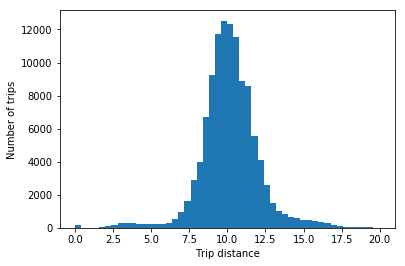

In [90]:
fig, ax = plt.subplots()
ax.hist(trips_toLGA['trip_distance'], 50)
ax.set_xlabel('Trip distance')
ax.set_ylabel('Number of trips')
plt.show()

In [91]:
trips_toLGA = trips_toLGA.pipe(distance)

In [95]:
trips_toLGA = trips_toLGA.loc[trips_toLGA['distance'] < 15, :]

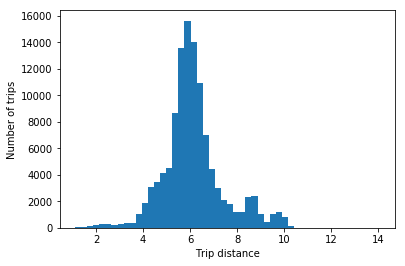

In [96]:
fig, ax = plt.subplots()
ax.hist(trips_toLGA['distance'], 50)
ax.set_xlabel('Trip distance')
ax.set_ylabel('Number of trips')
plt.show()

In [97]:
trips_toLGA['distance_ratio'] = trips_toLGA['trip_distance']/trips_toLGA['distance']
trips_toLGA

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pku_LGA,dpo_LGA,pku_time,dpo_time,distance,distance_ratio
268,2016-01-29 09:18:33,2016-01-29 09:40:10,10.76,-73.977135,40.751945,-73.870529,40.773758,5.773101,0.053690,2016-01-29 09:18:33,2016-01-29 09:40:10,5.771114,1.864458
307,2016-01-29 09:18:39,2016-01-29 09:45:00,8.82,-73.975693,40.765018,-73.870613,40.773979,5.538719,0.069572,2016-01-29 09:18:39,2016-01-29 09:45:00,5.525810,1.596146
388,2016-01-29 09:18:54,2016-01-29 10:08:47,12.93,-74.000771,40.762310,-73.865028,40.770580,6.861671,0.319477,2016-01-29 09:18:54,2016-01-29 10:08:47,7.116673,1.816860
547,2016-01-29 09:19:22,2016-01-29 09:44:07,13.30,-74.015770,40.711155,-73.872437,40.774536,8.724008,0.155988,2016-01-29 09:19:22,2016-01-29 09:44:07,8.675986,1.532967
549,2016-01-29 09:19:22,2016-01-29 10:01:30,8.76,-73.977409,40.753002,-73.861877,40.768440,5.769067,0.538587,2016-01-29 09:19:22,2016-01-29 10:01:30,6.131351,1.428723
551,2016-01-29 09:19:23,2016-01-29 09:51:46,10.30,-73.985771,40.760078,-73.861649,40.768291,6.103679,0.554296,2016-01-29 09:19:23,2016-01-29 09:51:46,6.511458,1.581827
600,2016-01-29 09:19:32,2016-01-29 09:47:54,9.30,-73.984108,40.755341,-73.871193,40.774200,6.075012,0.096120,2016-01-29 09:19:32,2016-01-29 09:47:54,6.042768,1.539030
691,2016-01-29 09:19:48,2016-01-29 09:49:40,10.00,-73.975052,40.787968,-73.865036,40.770565,5.573094,0.319693,2016-01-29 09:19:48,2016-01-29 09:49:40,5.872296,1.702911
736,2016-01-29 09:19:56,2016-01-29 09:46:04,8.54,-73.960808,40.780991,-73.873009,40.774441,4.764664,0.175449,2016-01-29 09:19:56,2016-01-29 09:46:04,4.609726,1.852605
767,2016-01-29 09:20:02,2016-01-29 09:40:16,10.60,-73.973946,40.756927,-73.872459,40.774529,5.532686,0.156522,2016-01-29 09:20:02,2016-01-29 09:40:16,5.440903,1.948206


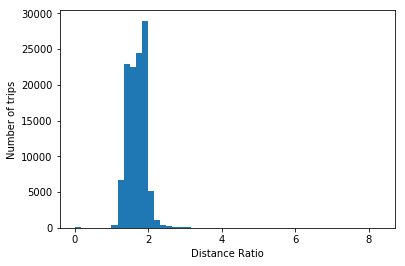

In [98]:
fig, ax = plt.subplots()
ax.hist(trips_toLGA['distance_ratio'], 50)
ax.set_xlabel('Distance Ratio')
ax.set_ylabel('Number of trips')
plt.show()

In [99]:
trips_toLGA['distance_ratio'].mean()

1.679348696796246

In [100]:
trips_toLGA = trips_toLGA.loc[(trips_toLGA['dpo_time']-trips_toLGA['pku_time'])/timedelta(seconds=1) != 0.0, :]

In [101]:
trips_toLGA['avg_speed'] = trips_toLGA['trip_distance']/((trips_toLGA['dpo_time']-trips_toLGA['pku_time'])/timedelta(seconds=1)/3600)

/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [110]:
trips_toLGA = trips_toLGA.loc[trips_toLGA['avg_speed'] < 50.0, :]

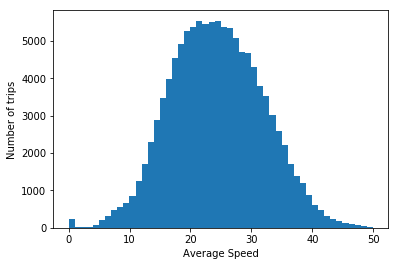

In [111]:
fig, ax = plt.subplots()
ax.hist(trips_toLGA['avg_speed'], 50)
ax.set_xlabel('Average Speed')
ax.set_ylabel('Number of trips')
plt.show()

In [112]:
trips_toLGA['avg_speed'].mean()

24.348246861714014

In [115]:
trips_toLGA_pool = trips_toLGA.loc[(trips_toLGA['dpo_time'] >= datetime(2016,1,15,0,0,0)) & (trips_toLGA['dpo_time'] < datetime(2016,1,16,0,0,0)),:]

In [116]:
trips_toLGA_pool

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pku_LGA,dpo_LGA,pku_time,dpo_time,distance,distance_ratio,avg_speed
2196141,2016-01-15 20:05:10,2016-01-15 20:26:33,8.88,-73.971909,40.794441,-73.870667,40.773911,5.514163,0.065961,2016-01-15 20:05:10,2016-01-15 20:26:33,5.475818,1.621675,24.916602
2196186,2016-01-15 20:05:19,2016-01-15 20:28:31,6.33,-73.964645,40.760769,-73.870850,40.762157,5.005848,0.749773,2016-01-15 20:05:19,2016-01-15 20:28:31,4.902982,1.291051,16.370690
2196512,2016-01-15 20:06:08,2016-01-15 20:35:14,11.34,-73.976547,40.751640,-73.861877,40.768532,5.748771,0.534910,2016-01-15 20:06:08,2016-01-15 20:35:14,6.105388,1.857376,23.381443
2196669,2016-01-15 11:02:17,2016-01-15 11:44:56,11.50,-73.995583,40.749142,-73.864861,40.770409,6.755238,0.333209,2016-01-15 11:02:17,2016-01-15 11:44:56,6.987907,1.645700,16.178195
2196670,2016-01-15 11:02:17,2016-01-15 11:30:50,11.61,-73.981995,40.755695,-73.865601,40.770973,5.961887,0.279887,2016-01-15 11:02:17,2016-01-15 11:30:50,6.173595,1.880590,24.399299
2196687,2016-01-15 11:02:20,2016-01-15 11:24:29,9.60,-73.978348,40.737087,-73.864975,40.770561,6.170904,0.322543,2016-01-15 11:02:20,2016-01-15 11:24:29,6.360093,1.509412,26.004515
2196702,2016-01-15 11:02:22,2016-01-15 11:26:40,8.95,-73.985291,40.751068,-73.870506,40.773842,6.201081,0.058949,2016-01-15 11:02:22,2016-01-15 11:26:40,6.201271,1.443252,22.098765
2196753,2016-01-15 11:02:31,2016-01-15 11:30:51,10.17,-73.981812,40.732304,-73.866516,40.771317,6.473550,0.226651,2016-01-15 11:02:31,2016-01-15 11:30:51,6.600427,1.540809,21.536471
2196754,2016-01-15 11:02:31,2016-01-15 11:18:47,9.04,-73.982079,40.740425,-73.872330,40.774349,6.263505,0.143293,2016-01-15 11:02:31,2016-01-15 11:18:47,6.195370,1.459154,33.344262
2196796,2016-01-15 11:02:41,2016-01-15 11:29:21,17.00,-74.013794,40.708885,-73.861938,40.768593,8.712657,0.529875,2016-01-15 11:02:41,2016-01-15 11:29:21,8.944425,1.900625,38.250000


In [117]:
def distanceTwoPKU(trip1, trip2):
    pku_long_rad = trip1.pickup_longitude*np.pi/180
    pku_lat_rad = trip1.pickup_latitude*np.pi/180
    dpo_long_rad = trip2.pickup_longitude*np.pi/180
    dpo_lat_rad = trip2.pickup_latitude*np.pi/180
    drad = 2*np.arcsin(np.sqrt(np.sin((pku_lat_rad-dpo_lat_rad)/2)*np.sin((pku_lat_rad-dpo_lat_rad)/2)+np.cos(pku_lat_rad)*np.cos(dpo_lat_rad)*np.sin((pku_long_rad-dpo_long_rad)/2)*np.sin((pku_long_rad-dpo_long_rad)/2)))
    dmile = drad*180*60*1.15/np.pi
    return dmile

In [118]:
startTime = datetime(2016,1,15,0,0,0)
delta = timedelta(minutes=5)
milesaves_LGA = []
tripsaves_LGA = []
computetimes_LGA = []
for k in range(0, 288):
    pool = trips_toLGA_pool.loc[(trips_toLGA_pool['dpo_time'] >= startTime + k*delta) & (trips_toLGA_pool['dpo_time'] < startTime + (k+1)*delta),:]
    if (len(pool) > 0):
        G.clear()
        for n in range(len(pool)):
            G.add_node(n)
        saving = 0.0
        starttime = datetime.now()
        for i in range(len(pool) - 1):
            for j in range(i+1, len(pool)):
                d = distanceTwoPKU(pool.iloc[i], pool.iloc[j])*1.679
                if (d < pool.iloc[i].trip_distance) or (d < pool.iloc[j].trip_distance):
                    tHA = (pool.iloc[i].dpo_time - pool.iloc[i].pku_time)/timedelta(seconds=1)
                    tHB = (pool.iloc[j].dpo_time - pool.iloc[j].pku_time)/timedelta(seconds=1)
                    delayA = tHA * 0.2
                    delayB = tHB * 0.2
                    tAB = d * 3600 / 24.348
                    if (pool.iloc[i].pku_time <= pool.iloc[j].pku_time):
                        delta_PKU = (pool.iloc[j].pku_time - pool.iloc[i].pku_time)/timedelta(seconds=1)
                        if (tAB <= delta_PKU + delayB) and (tAB + tHB <= tHA + delayA):
                            saved = pool.iloc[i].trip_distance + pool.iloc[j].trip_distance - d
                            G.add_edge(i, j, weight=saved)
                    else:
                        if (tAB <= delta_PKU + delayA) and (tAB + tHA <= tHB + delayB):
                            saved = pool.iloc[i].trip_distance + pool.iloc[j].trip_distance - d
                            G.add_edge(i, j, weight=saved)
        matching = nx.algorithms.matching.max_weight_matching(G, maxcardinality=False, weight='weight')
        endtime = datetime.now()
        for m in matching:
            saving = saving + G.edges[m[0], m[1]]['weight']
        milesaves_LGA.append(saving/pool['trip_distance'].sum())
        tripsaves_LGA.append(len(matching)/len(pool))
        computetimes_LGA.append((endtime-starttime)/timedelta(seconds=1))

In [119]:
np.average(milesaves_LGA)

0.740833357977186

In [120]:
np.average(tripsaves_LGA)

0.38883030722430206

In [121]:
np.average(computetimes_LGA)

1.2556058588235293

In [122]:
startTime = datetime(2016,1,15,0,0,0)
delta = timedelta(minutes=10)
milesaves_LGA10 = []
tripsaves_LGA10 = []
computetimes_LGA10 = []
for k in range(0, 144):
    pool = trips_toLGA_pool.loc[(trips_toLGA_pool['dpo_time'] >= startTime + k*delta) & (trips_toLGA_pool['dpo_time'] < startTime + (k+1)*delta),:]
    if (len(pool) > 0):
        G.clear()
        for n in range(len(pool)):
            G.add_node(n)
        saving = 0.0
        starttime = datetime.now()
        for i in range(len(pool) - 1):
            for j in range(i+1, len(pool)):
                d = distanceTwoPKU(pool.iloc[i], pool.iloc[j])*1.679
                if (d < pool.iloc[i].trip_distance) or (d < pool.iloc[j].trip_distance):
                    tHA = (pool.iloc[i].dpo_time - pool.iloc[i].pku_time)/timedelta(seconds=1)
                    tHB = (pool.iloc[j].dpo_time - pool.iloc[j].pku_time)/timedelta(seconds=1)
                    delayA = tHA * 0.2
                    delayB = tHB * 0.2
                    tAB = d * 3600 / 24.348
                    if (pool.iloc[i].pku_time <= pool.iloc[j].pku_time):
                        delta_PKU = (pool.iloc[j].pku_time - pool.iloc[i].pku_time)/timedelta(seconds=1)
                        if (tAB <= delta_PKU + delayB) and (tAB + tHB <= tHA + delayA):
                            saved = pool.iloc[i].trip_distance + pool.iloc[j].trip_distance - d
                            G.add_edge(i, j, weight=saved)
                    else:
                        if (tAB <= delta_PKU + delayA) and (tAB + tHA <= tHB + delayB):
                            saved = pool.iloc[i].trip_distance + pool.iloc[j].trip_distance - d
                            G.add_edge(i, j, weight=saved)
        matching = nx.algorithms.matching.max_weight_matching(G, maxcardinality=False, weight='weight')
        endtime = datetime.now()
        for m in matching:
            saving = saving + G.edges[m[0], m[1]]['weight']
        milesaves_LGA10.append(saving/pool['trip_distance'].sum())
        tripsaves_LGA10.append(len(matching)/len(pool))
        computetimes_LGA10.append((endtime-starttime)/timedelta(seconds=1))

In [123]:
np.average(milesaves_LGA10)

0.745873284666014

In [124]:
np.average(tripsaves_LGA10)

0.39157683423463185

In [125]:
np.average(computetimes_LGA10)

4.683359674074074

In [126]:
startTime = datetime(2016,1,15,0,0,0)
delta = timedelta(minutes=10)
milesaves_LGA10 = []
tripsaves_LGA10 = []
computetimes_LGA10 = []
start = datetime.now()
for k in range(0, 144):
    current = datetime.now()
    if ((current-start)/timedelta(seconds=1)>300):
        break
    pool = trips_toLGA_pool.loc[(trips_toLGA_pool['dpo_time'] >= startTime + k*delta) & (trips_toLGA_pool['dpo_time'] < startTime + (k+1)*delta),:]
    if (len(pool) > 0):
        G.clear()
        for n in range(len(pool)):
            G.add_node(n)
        saving = 0.0
        starttime = datetime.now()
        for i in range(len(pool) - 1):
            for j in range(i+1, len(pool)):
                d = distanceTwoPKU(pool.iloc[i], pool.iloc[j])*1.679
                if (d < pool.iloc[i].trip_distance) or (d < pool.iloc[j].trip_distance):
                    tHA = (pool.iloc[i].dpo_time - pool.iloc[i].pku_time)/timedelta(seconds=1)
                    tHB = (pool.iloc[j].dpo_time - pool.iloc[j].pku_time)/timedelta(seconds=1)
                    delayA = tHA * 0.2
                    delayB = tHB * 0.2
                    tAB = d * 3600 / 24.348
                    if (pool.iloc[i].pku_time <= pool.iloc[j].pku_time):
                        delta_PKU = (pool.iloc[j].pku_time - pool.iloc[i].pku_time)/timedelta(seconds=1)
                        if (tAB <= delta_PKU + delayB) and (tAB + tHB <= tHA + delayA):
                            saved = pool.iloc[i].trip_distance + pool.iloc[j].trip_distance - d
                            G.add_edge(i, j, weight=saved)
                    else:
                        if (tAB <= delta_PKU + delayA) and (tAB + tHA <= tHB + delayB):
                            saved = pool.iloc[i].trip_distance + pool.iloc[j].trip_distance - d
                            G.add_edge(i, j, weight=saved)
        matching = nx.algorithms.matching.max_weight_matching(G, maxcardinality=False, weight='weight')
        endtime = datetime.now()
        for m in matching:
            saving = saving + G.edges[m[0], m[1]]['weight']
        milesaves_LGA10.append(saving/pool['trip_distance'].sum())
        tripsaves_LGA10.append(len(matching)/len(pool))
        computetimes_LGA10.append((endtime-starttime)/timedelta(seconds=1))

In [127]:
(current-start)/timedelta(seconds=1)

302.848979

In [128]:
len(milesaves_LGA10)

71